In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv('County_Health_Rankings.csv')
df.head()


,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,Confidence Interval Lower Bound,Confidence Interval Upper Bound,Data Release Year,fipscode
0,US,United States,0.0,0.0,2003-2005,Violent crime rate,43.0,1328750.667,274877117.0,483.398066,NaN,NaN,NaN,0.0
1,US,United States,0.0,0.0,2004-2006,Violent crime rate,43.0,1340928.667,277612778.5,483.021233,NaN,NaN,NaN,0.0
2,US,United States,0.0,0.0,2005-2007,Violent crime rate,43.0,1355853.167,280407694.7,483.529230,NaN,NaN,2010.0,0.0
3,US,United States,0.0,0.0,2006-2008,Violent crime rate,43.0,1366928.333,287614567.7,475.263942,NaN,NaN,2011.0,0.0
4,US,United States,0.0,0.0,2007-2009,Violent crime rate,43.0,1339439.333,292576281.2,457.808585,NaN,NaN,2012.0,0.0


In [4]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303864 entries, 0 to 303863
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   State                            303858 non-null  object 
 1   County                           303858 non-null  object 
 2   State code                       303860 non-null  float64
 3   County code                      303860 non-null  float64
 4   Year span                        303390 non-null  object 
 5   Measure name                     303390 non-null  object 
 6   Measure id                       303390 non-null  float64
 7   Numerator                        214076 non-null  float64
 8   Denominator                      184779 non-null  float64
 9   Raw value                        289956 non-null  float64
 10  Confidence Interval Lower Bound  189412 non-null  float64
 11  Confidence Interval Upper Bound  189412 non-null  float64
 12  Da

In [5]:
# Check for missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)


,Missing Values,Percentage (%)
Data Release Year,153735,50.593358
Denominator,119085,39.190230
Confidence Interval Upper Bound,114452,37.665535
Confidence Interval Lower Bound,114452,37.665535
Numerator,89788,29.548745
Raw value,13908,4.577048
fipscode,9581,3.153055
Year span,474,0.155991
Measure name,474,0.155991
Measure id,474,0.155991


In [6]:
# Basic descriptive statistics
df.describe(include='all')


,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,Confidence Interval Lower Bound,Confidence Interval Upper Bound,Data Release Year,fipscode
count,303858,303858,303860.000000,303860.000000,303390,303390,303390.000000,2.140760e+05,1.847790e+05,289956.000000,189412.000000,189412.000000,150129.000000,294283.000000
unique,53,2008,NaN,NaN,26,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TX,Washington County,NaN,NaN,2008,Children in poverty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24225,2850,NaN,NaN,31927,41499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,30.351807,101.981422,NaN,NaN,38.699071,1.253031e+04,1.354018e+05,1075.912013,1348.410687,1851.042897,2012.256280,30456.873139
std,NaN,NaN,15.238258,107.824989,NaN,NaN,36.791425,3.516778e+05,3.666322e+06,2851.499091,2902.214152,3998.423557,1.312575,15258.982388
min,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,0.000000e+00,1.000000e+01,0.000000,0.000000,0.000000,2010.000000,0.000000
25%,NaN,NaN,18.000000,33.000000,NaN,NaN,7.000000,2.180000e+02,2.127000e+03,0.200000,0.183425,0.277939,2011.000000,18179.000000
50%,NaN,NaN,29.000000,77.000000,NaN,NaN,24.000000,8.190000e+02,8.446023e+03,0.585000,0.278000,0.400000,2012.000000,29183.000000
75%,NaN,NaN,45.000000,133.000000,NaN,NaN,50.000000,2.686000e+03,2.822000e+04,91.082228,62.000000,77.000000,2013.000000,45087.000000


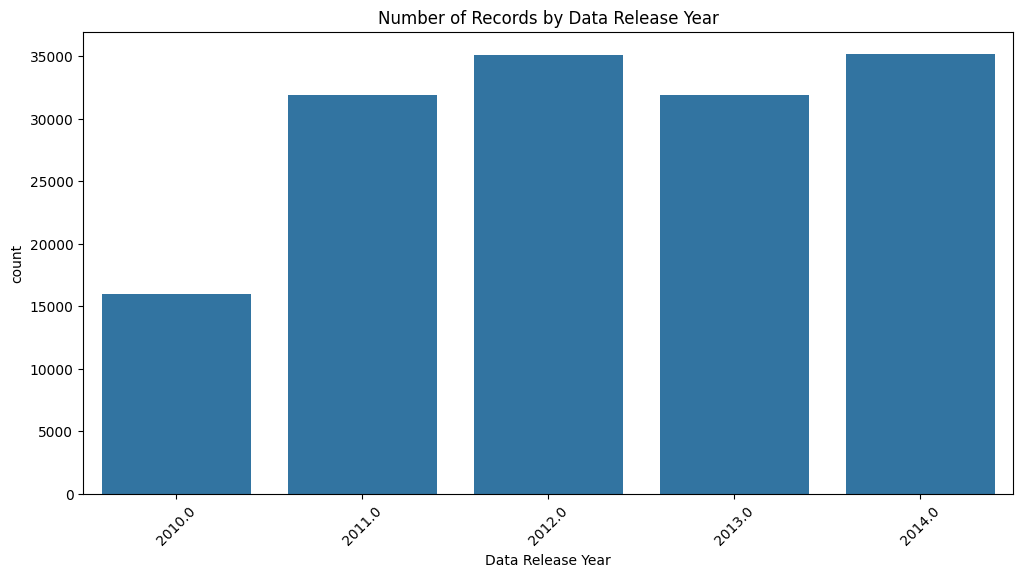

In [7]:
# Measures available over the years
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Data Release Year', order=sorted(df['Data Release Year'].dropna().unique()))
plt.title('Number of Records by Data Release Year')
plt.xticks(rotation=45)
plt.show()


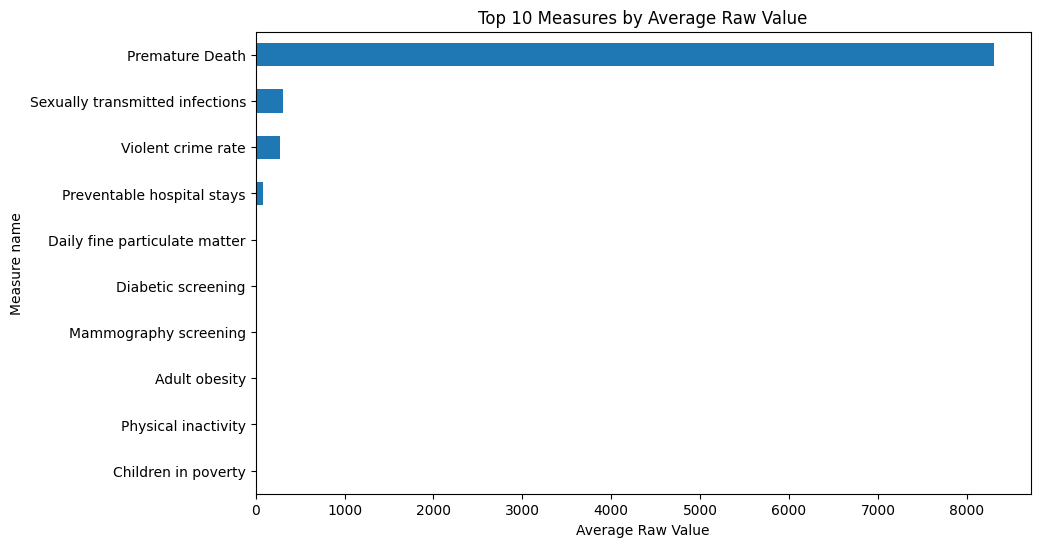

In [8]:
# Average Raw Value per Measure
avg_raw_by_measure = df.groupby('Measure name')['Raw value'].mean().sort_values(ascending=False).head(10)
avg_raw_by_measure.plot(kind='barh', figsize=(10, 6), title='Top 10 Measures by Average Raw Value')
plt.xlabel('Average Raw Value')
plt.gca().invert_yaxis()
plt.show()


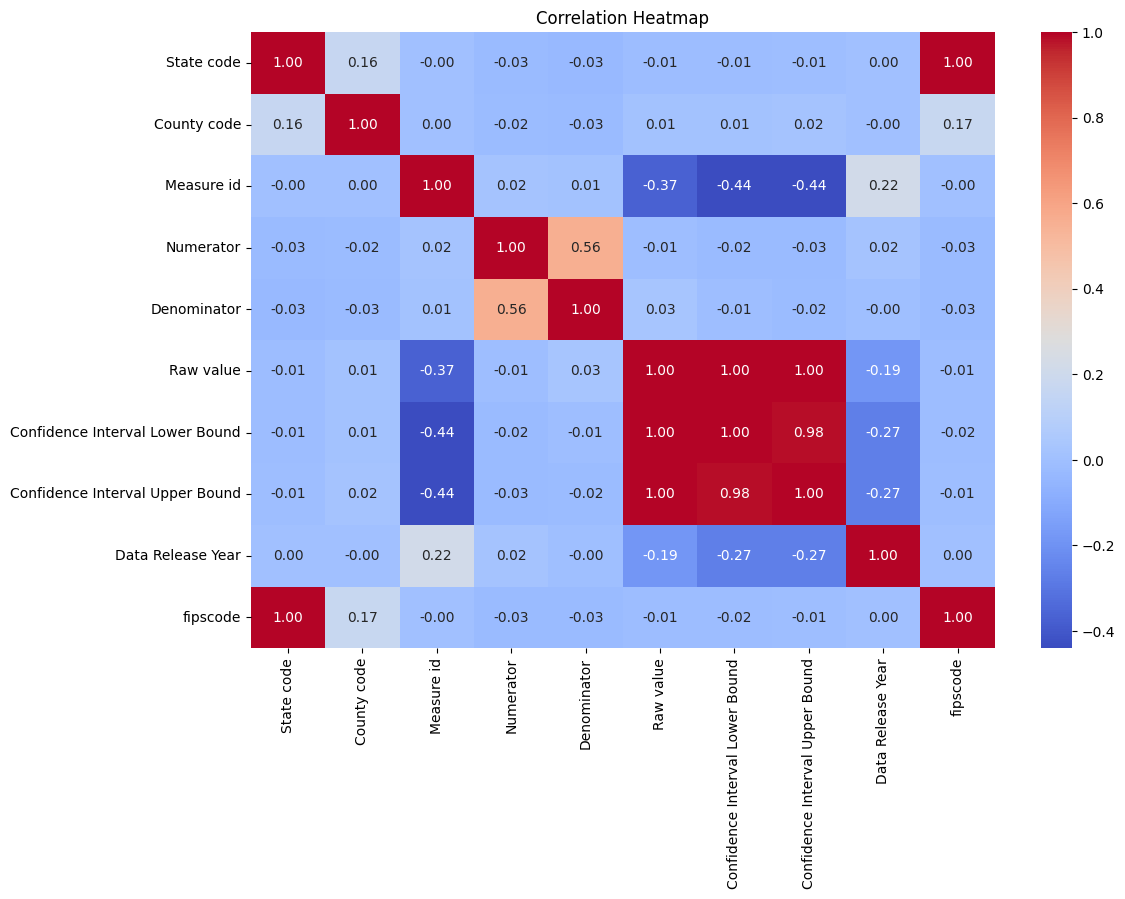

In [9]:
# Heatmap of numeric correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


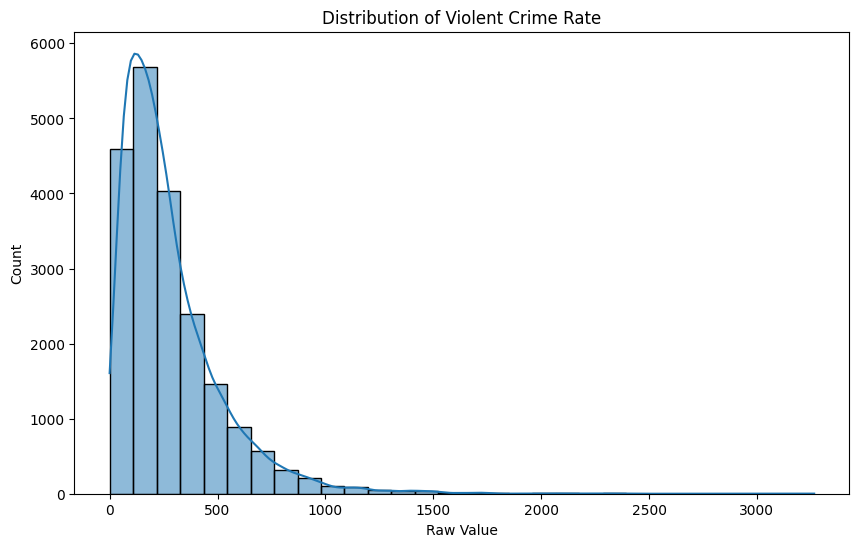

In [10]:
# Distribution of a specific measure (e.g., Violent crime rate)
vc_data = df[df['Measure name'] == 'Violent crime rate']
plt.figure(figsize=(10, 6))
sns.histplot(vc_data['Raw value'].dropna(), bins=30, kde=True)
plt.title("Distribution of Violent Crime Rate")
plt.xlabel("Raw Value")
plt.show()


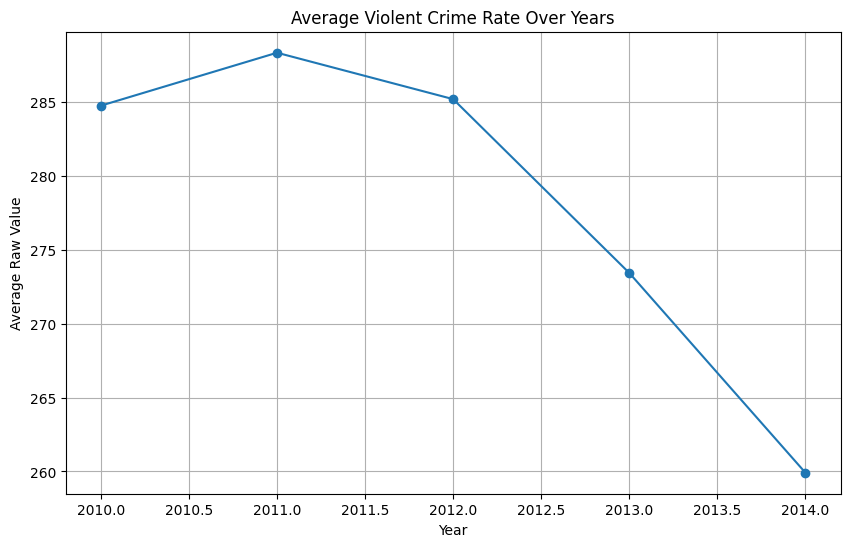

In [11]:
# Trend of Violent crime rate over the years
plt.figure(figsize=(10, 6))
vc_trend = vc_data.groupby('Data Release Year')['Raw value'].mean()
vc_trend.plot(marker='o')
plt.title('Average Violent Crime Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Average Raw Value')
plt.grid(True)
plt.show()


In [15]:
# Count of unique measures
df['Measure name'].value_counts().head(10)


Measure name
Children in poverty              41499
Premature Death                  38312
Unemployment                     35202
Daily fine particulate matter    28728
Physical inactivity              22351
Violent crime rate               22351
Adult obesity                    22351
Diabetic screening               19159
Preventable hospital stays       19159
Mammography screening            19159
Name: count, dtype: int64

In [ ]:
cleaned_df = df.dropna(subset=['State', 'County', 'Measure name', 'Raw value'])
cleaned_df.to_csv('County_Health_Rankings.csv', index=False)
